In [2]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [17]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Student-t Test
### Contents
    1. t-test
        a. one-sample t-test
        b. independent t-test
        c. dependent t-test
    2. Confidence interval for the one-sample t-test

## 1. T-test

Some text # docu: https://stats.stackexchange.com/questions/149595/ks-test-how-is-the-p-value-calculated


#### 1a. One-sample t-test

In [165]:
# generate data
#np.random.seed(1)                           # seed the random number generator, so we will generate same random set
data = 5 * np.random.randn(100) + 50        # generate two independent samples
mu = 50

In [177]:
# two-sided one-sample t-test
# tests whether sample mean differs from known population mean mu
def one_sample_ttest(data, mu, alpha=0.05):
    from scipy.stats import sem
    from scipy.stats import t    
    # calculate means
    sample_mean = np.mean(data)
    # calculate standard errors
    std_err = sem(data)
    # calculate the t statistic
    t_stat = (sample_mean - mu) / std_err
    # degrees of freedom
    df = len(data) - 1
    # calculate the critical value --> optional
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0  # since t-distr is symmetric, difference between one and two sided test is a factor of 2
    # return everything
    return t_stat, df, cv, std_err, p

t_stat, df, cv, sem, p = one_sample_ttest(data, mu, 0.05)
print("We claim:")
print("    t_stat: " + str(t_stat))
print("    critical value: " + str(cv))
print("    p-value: " + str(p))


# check with scipy
from scipy.stats  import ttest_1samp
stat, p = ttest_1samp(data, mu)
print("Scipy says:")
print("    t_stat: " + str(stat))
print("    p-value: " + str(p))

We claim:
    t_stat: -0.943281464892429
    critical value: 1.6603911559963895
    p-value: 0.3478332531610755
Scipy says:
    t_stat: -0.943281464892429
    p-value: 0.3478332531610755


#### 1b. Independent t-test

In [146]:
# generate new data
#np.random.seed(1)                           # seed the random number generator, so we will generate same random set
data1 = 5 * np.random.randn(100) + 50       # generate two independent samples
data2 = 5 * np.random.randn(100) + 51


In [150]:
# independent t-test

def independent_ttest(data1, data2, alpha=0.05):
    from scipy.stats import sem
    from scipy.stats import t
    
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2 + se2**2)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

t_stat, df, cv, p = independent_ttest(data1, data2, 0.05)
print("We claim:")
print("    t_stat: " + str(t_stat))
print("    critical value: " + str(cv))
print("    p-value: " + str(p))


# check with scipy
from scipy.stats  import ttest_ind
stat, p = ttest_ind(data1, data2)
print("Scipy says:")
print("    t_stat: " + str(stat))
print("    p-value: " + str(p))

We claim:
    t_stat: -2.2620139704259556
    critical value: 1.6525857836172075
    p-value: 0.024782819014639745
Scipy says:
    t_stat: -2.2620139704259556
    p-value: 0.024782819014639627


#### Dependent t-test

In [161]:
# generate new data
#np.random.seed(1)                           # seed the random number generator, so we will generate same random set
data1 = 5 * np.random.randn(100) + 50       # generate two independent samples
data2 = 5 * np.random.randn(100) + 51

In [162]:
# dependent t-test

def dependent_ttest(data1, data2, alpha):
    from scipy.stats import t
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # number of paired samples
    n = len(data1)
    # sum squared difference between observations
    d1 = sum([(data1[i]-data2[i])**2 for i in range(n)])
    # sum difference between observations
    d2 = sum([data1[i]-data2[i] for i in range(n)])
    # standard deviation of the difference between means
    sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
    # standard error of the difference between the means
    sed = sd / np.sqrt(n)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

t_stat, df, cv, p = dependent_ttest(data1, data2, 0.05)
print("We claim:")
print("    t_stat: " + str(t_stat))
print("    critical value: " + str(cv))
print("    p-value: " + str(p))


# check with scipy
from scipy.stats  import ttest_rel
stat, p = ttest_rel(data1, data2)
print("Scipy says:")
print("    t_stat: " + str(stat))
print("    p-value: " + str(p))

We claim:
    t_stat: -1.1250587401346515
    critical value: 1.6603911559963895
    p-value: 0.26328439170088336
Scipy says:
    t_stat: -1.1250587401346575
    p-value: 0.26328439170088086


## 2. Confidence interval for the one-sample t-test
#### 2a. Analytical confidence interval

In [184]:
# generate data
#np.random.seed(1)    # seed the random number generator, so we will generate same random set
mu = 33
data = 5 * np.random.randn(100) + mu        
obs_mean = np.round(np.mean(data), 2)

In [186]:
# two-sided one-sample t-test
# tests whether sample mean differs from known population mean mu

t_stat, df, cv, sem, p = one_sample_ttest(data, mu, 0.05)

# compute confidence interval
CI_low = np.mean(data) - cv*sem/np.sqrt(len(data))
CI_up = np.mean(data) + cv*sem/np.sqrt(len(data))
obs_mean = np.round(np.mean(data), 2)
    
print(r'with 95% conf., $\mu$ lies within: (' + str(np.round(CI_low, 2)) + ", " + str(np.round(CI_up,2)) + ')')
print("observed mean: "+ str(obs_mean)  )
print("true mean: "+ str(np.round(mu, 2)))  

with 95% conf., $\mu$ lies within: (32.96, 33.14)
observed mean: 33.05
true mean: 33


#### 2b. Bootstrapped confidence interval

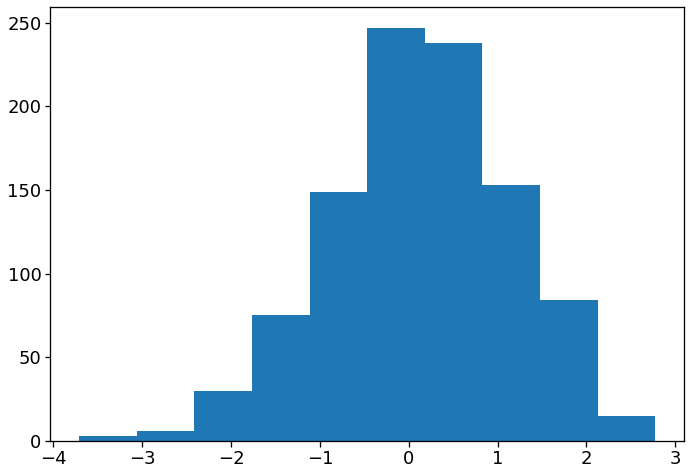

Bootstrap: real mean lies within: (32.94, 33.16)
t - confidence:, real mean lies within: (32.96, 33.14)
observed mean: 33.05
true mean: 33


In [187]:
# now with bootstrap
# https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Bootstrap_hypothesis_testing
# Chapter 4 of A.C. Davison and D.V. Hinkley (1997) Bootstrap Methods and their Application. Cambridge: Cambridge University Press.
# Chapter 16 of Bradley Efron and Robert J. Tibshirani (1993) An Introduction to the Bootstrap. Boca Raton: Chapman & Hall/CRC.
# https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Deriving_confidence_intervals_from_the_bootstrap_distribution

sim = []
sample_size = len(data)
n_iter = 1000
for i in range(n_iter):
    itersample = np.random.choice(data, size=sample_size, replace=True)
    t_stat, _, _, _, _ = one_sample_ttest(itersample, mu)
    sim.append(t_stat)
sim.sort()

def confidence_interval(sim, alpha):
    """
    Return 2-sided symmetric confidence interval specified
    by p.
    """
    n = len(sim)
    u_pval = 1 - alpha/2
    l_pval = alpha / 2
    l_idx = int(np.floor(n*l_pval))
    u_idx = int(np.floor(n*u_pval))
    return(sim[l_idx], sim[u_idx])

## SMTH GOING WRONG: check later
bounds = confidence_interval(sim, alpha = 0.05)

plt.hist(sim)
plt.show()

CI_low_boots = np.mean(data) + bounds[0]*sem/np.sqrt(len(data))
CI_up_boots = np.mean(data) + bounds[1]*sem/np.sqrt(len(data))

print("Bootstrap: real mean lies within: (" + str(np.round(CI_low_boots, 2)) + ", " + str(np.round(CI_up_boots,2)) + ")")
print("t - confidence:, real mean lies within: (" + str(np.round(CI_low, 2)) + ", " + str(np.round(CI_up,2)) + ")")
print("observed mean: "+ str(obs_mean)  )
print("true mean: "+ str(np.round(mu, 2)))  